In [40]:
import numpy as np
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
train_data_1 = unpickle("data_batch_1")
test_data = unpickle("test_batch")

In [29]:
test_data_label = test_data[b'labels']
test_data_image = test_data[b'data'].reshape(-1, 32*32*3)
train_data_1_label = train_data_1[b'labels']
train_data_1_image = train_data_1[b'data'].reshape(-1, 32*32*3)


In [45]:
for n_neighbors in range(3, 9):
    # Initialize the KNN model with varying number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model
    knn.fit(train_data_1_image, train_data_1_label)

    # Make predictions on the training set
    pred = knn.predict(train_data_1_image)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(train_data_1_label, pred)
    print("Accuracy for n_neighbors =", n_neighbors, ":", accuracy)

Accuracy for n_neighbors = 3 : 0.543
Accuracy for n_neighbors = 4 : 0.5043
Accuracy for n_neighbors = 5 : 0.4702
Accuracy for n_neighbors = 6 : 0.4381
Accuracy for n_neighbors = 7 : 0.4246
Accuracy for n_neighbors = 8 : 0.4117


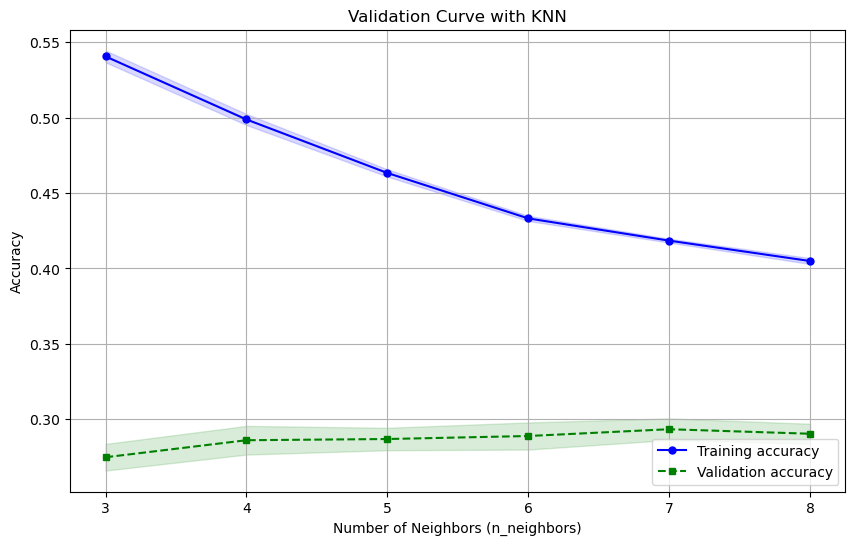

In [41]:
param_range = np.arange(3, 9)

# Calculate validation scores for each value of n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), 
    train_data_1_image, 
    train_data_1_label, 
    param_name="n_neighbors", 
    param_range=param_range, 
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color="blue", marker="o", markersize=5, label="Training accuracy")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
plt.plot(param_range, test_mean, color="green", linestyle="--", marker="s", markersize=5, label="Validation accuracy")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color="green")
plt.title("Validation Curve with KNN")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Accuracy")
plt.xticks(param_range)
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
## As the plot shows, the training accuracy drops as the number of neighbors picked increases. Therefore, for KNN model, the best
## number of neighbors is 3. But as we can see, the accuracy is only 0.56, which is quite low. Thus, the KNN model might not be 
## suitable for image classification.